# Clean And  Analysis Used Cars from eBay Kleinanzeigen
In this project we are going to explore and analysis [Used cars database](https://www.kaggle.com/orgesleka/used-cars-database/data).
The data dictionary provided with data is as follows:

   - ```dateCrawled``` -  When this ad was first crawled. All field-values are taken from this date.
   - ```name``` -  Name of the car.
   - ```seller```- Whether the seller is private or a dealer.
   - ```offerType``` - The type of listing
   - ```price``` - The price on the ad to sell the car.
   - ```abtest``` - Whether the listing is included in an A/B test.
   - ```vehicleType``` - The vehicle Type.
   - ```yearOfRegistration``` - The year in which the car was first registered.
   - ```gearbox``` - The transmission type.
   - ```powerPS``` - The power of the car in PS.
   - ```model``` - The car model name.
   - ```kilometer``` - How many kilometers the car has driven.
   - ```monthOfRegistration``` - The month in which the car was first registered.
   - ```fuelType``` - What type of fuel the car uses.
   - ```brand``` - The brand of the car.
   - ```notRepairedDamage``` - If the car has a damage which is not yet repaired.
   - ```dateCreated``` - The date on which the eBay listing was created.
   - ```nrOfPictures``` - The number of pictures in the ad.
   - ```postalCode``` - The postal code for the location of the vehicle.
   - ```lastSeenOnline``` - When the crawler saw this ad last online.

The aim of this project is to clean the data and analyze the included used car listings.
## Over View Of The DataBase
In this section we are going to import and view some of the basic features of our data.

In [73]:
import pandas as pd
import numpy as np

autos = pd.read_csv("autos.csv", encoding = 'Latin-1')

In [74]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [75]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [76]:
autos.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model                  2758
odometer                  0
monthOfRegistration       0
fuelType               4482
brand                     0
notRepairedDamage      9829
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

The file couldn't be encoded using the ```utf-8``` so used ```Latin-1``` encoding, and the first observation we can make that there are a lot of messing values in the columns  ``notRepairedDamage``,``vehicleType``,``fuelType``, ``model`` and ``gearbox``.<br>
The second observation is that the columns are names are in camel-case so to make them more readable we are going to change them into snake-case.  

In [77]:
list(autos.columns)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'odometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'nrOfPictures',
 'postalCode',
 'lastSeen']

In [78]:
autos.columns = ['date_crawled',
 'name',
 'seller',
 'offer_type',
 'price',
 'abtest',
 'vehicle_type',
 'registration_year',
 'gearbox',
 'powerPS',
 'model',
 'odometer',
 'registration_month',
 'fuel_type',
 'brand',
 'unrepaired_damage',
 'date_created',
 'pictures_nr',
 'postal_code',
 'last_seen']

Now let's view statistical description to our data.

In [79]:
autos.describe()

,registration_year,powerPS,registration_month,pictures_nr,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [80]:
autos['registration_month'].unique()

array([ 3,  6,  7,  4,  8, 12, 10,  0,  9, 11,  5,  2,  1], dtype=int64)

In [81]:
autos['registration_year'].value_counts()

2000    3354
2005    3015
1999    3000
2004    2737
2003    2727
2006    2708
2001    2703
2002    2533
1998    2453
2007    2304
2008    2231
2009    2098
1997    2028
2011    1634
2010    1597
2017    1453
1996    1444
2012    1323
2016    1316
1995    1313
2013     806
2014     666
1994     660
2018     492
1993     445
2015     399
1990     395
1992     391
1991     356
1989     181
        ... 
1950       3
1955       2
9000       2
1954       2
1800       2
1957       2
1941       2
1951       2
1934       2
4100       1
4800       1
1953       1
1111       1
1927       1
6200       1
4500       1
1943       1
5911       1
1939       1
1938       1
2800       1
8888       1
1000       1
1500       1
1948       1
1931       1
1929       1
1001       1
9996       1
1952       1
Name: registration_year, Length: 97, dtype: int64

In [82]:
len(autos.loc[(autos['registration_year']>2015)|(autos['registration_year']<1900)])

3288

In [83]:
autos['postal_code'].value_counts()

10115    109
65428    104
66333     54
45888     50
44145     48
48599     47
65933     45
65719     44
15344     43
37154     42
50354     42
52525     42
38518     40
44339     40
32791     40
51065     40
77933     40
45881     40
30419     40
25524     39
33378     39
32257     39
46325     39
53773     38
61169     38
85055     38
60386     37
65929     37
52477     37
21423     37
        ... 
76872      1
88486      1
82405      1
74249      1
7927       1
29379      1
86759      1
19300      1
56182      1
31618      1
29571      1
17349      1
31714      1
76776      1
91233      1
40670      1
17509      1
74921      1
54455      1
97506      1
95491      1
9481       1
56598      1
91489      1
54647      1
23942      1
83365      1
95683      1
97794      1
67585      1
Name: postal_code, Length: 7014, dtype: int64

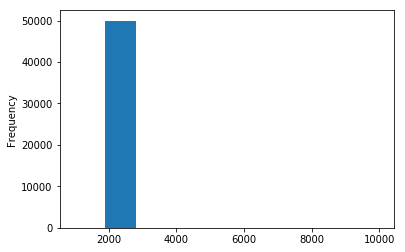

In [84]:
autos['registration_year'].plot.box(bins=10)

In [85]:
autos['pictures_nr'].unique()

array([0], dtype=int64)

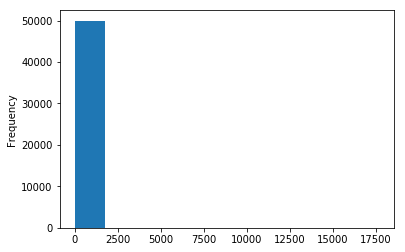

In [86]:
autos['powerPS'].plot.box()

We Can see a lot of problem with numeric data:
1. ``registration_month`` column contains the value 0 and I am pretty sure that month does not exist, and this column should not be considered as a numerical column.
2. ``registration_year`` have values as high as 1000 and as low as 1000 and the firs car ever made was in 1885 and also this column should not be a numeric one.
3. ``pictures_nr`` only contains one value so this column is not important at all.
4. ``postal_code`` there are some values which contains less than 5 characters and also this column should not be a numeric one.
5. ``powerPS`` contains value of 0 but all cars should have horse power to be able to move and it's impossible to be greater than 1000.

In [87]:
# removing pictures_nr
autos.drop('pictures_nr',inplace=True,axis=1)

#removing powerPS wrong values
autos.drop(autos.loc[(autos['powerPS']==0)|(autos['powerPS']>= 1000)].index, inplace=True) 

#removing registration_year wrong values
autos.drop(autos.loc[(autos['registration_year'] < 1885)|(autos['powerPS']>= 2015)].index, inplace=True) 

#removing registration_month wrong values
autos.drop(autos.loc[(autos['registration_month'] == 0)].index, inplace=True)

#removing postal_code wrong values
autos['postal_code']=autos['postal_code'].astype(str)
autos.drop(autos.loc[(autos['postal_code'].str.len()<5)].index, inplace=True)


In [94]:
autos.describe()

,registration_year,powerPS,registration_month
count,39519.000000,39519.000000,39519.000000
mean,2004.249019,127.721729,6.359169
std,54.472659,63.939829,3.344872
min,1927.000000,1.000000,1.000000
25%,1999.000000,80.000000,3.000000
50%,2004.000000,116.000000,6.000000
75%,2008.000000,150.000000,9.000000
max,9000.000000,999.000000,12.000000


In [95]:
autos['registration_year']=autos['registration_year'].astype(str)
autos['registration_month']=autos['registration_month'].astype(str)

Now that the values seems reasonable we are going to explore the non-numeric date.

In [96]:
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen
count,39519,39519,39519,39519,39519,39519,37365,39519,38957,39519.000000,38114,39519,39519,37549,39519,34433,39519,39519,39519
unique,38388,30194,1,1,2231,2,8,74,2,NaN,243,13,12,7,40,2,72,6268,32263
top,2016-03-12 16:06:22,BMW_316i,privat,Angebot,$0,test,limousine,2006,manuell,NaN,golf,"150,000km",3,benzin,volkswagen,nein,2016-04-03 00:00:00,10115,2016-04-07 04:46:51
freq,3,72,39519,39519,602,20313,10863,2395,30021,NaN,3228,24982,4487,24379,8281,30766,1560,108,6
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.721729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.939829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
print(autos['offer_type'].value_counts())
print()
print(autos['gearbox'].value_counts())
print()
print(autos['unrepaired_damage'].value_counts())
print()
print(autos['abtest'].value_counts())
print()
print(autos['seller'].value_counts())

Angebot    39519
Name: offer_type, dtype: int64

manuell      30021
automatik     8936
Name: gearbox, dtype: int64

nein    30766
ja       3667
Name: unrepaired_damage, dtype: int64

test       20313
control    19206
Name: abtest, dtype: int64

privat    39519
Name: seller, dtype: int64


As the columns ``offer_type`` and ``seller`` contain only one unique values so they are not important.

In [98]:
autos.drop(['seller','offer_type'],
           inplace = True,axis=1)

The price and the odometer column are saved as strings but the should be numerical values, also we are going to change
odometer into km.

In [99]:
autos['price'] = autos['price'].str.replace('$','').str.replace(',','').astype(int)
autos['odometer'] = autos['odometer'].str.replace('km','').str.replace(',','').astype(int)
autos.rename({'odometer':'odometer_km'},axis = 1, inplace = True )

In [113]:
date_cols=['date_crawled', 'date_created','last_seen']
date_date=autos[date_cols]

In [115]:
for col in date_cols:
    date_date[col] = date_date[col].str[0:10]

C:\Users\Abd-Elrahman\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
date_date.head()

,date_crawled,date_created,last_seen
0,2016-03-26,2016-03-26,2016-04-06
1,2016-04-04,2016-04-04,2016-04-06
2,2016-03-26,2016-03-26,2016-04-06
3,2016-03-12,2016-03-12,2016-03-15
5,2016-03-21,2016-03-21,2016-04-06


In [131]:
date_persentage = pd.DataFrame()
date_persentage_cols = ['crawled','created','last_seen']
index = 0
for col in date_cols:
    val_cnt = date_date[col].value_counts(normalize=True, dropna=False)
    date_persentage[date_persentage_cols[index]] = (val_cnt/val_cnt.sum())*100
    index+=1
date_persentage = date_persentage.sort_index()

In [132]:
date_persentage.head()

,crawled,created,last_seen
2016-03-05,2.525368,2.239429,0.106278
2016-03-06,1.409449,1.553683,0.394747
2016-03-07,3.605860,3.489461,0.503555
2016-03-08,3.274374,3.261722,0.705990
2016-03-09,3.213644,3.216174,0.928667


In [133]:
date_persentage.describe()

,crawled,created,last_seen
count,34.000000,34.000000,34.000000
mean,2.941176,2.928152,2.941176
std,0.976704,0.967452,4.472949
min,0.146765,0.129052,0.106278
25%,2.973253,3.003619,1.220932
50%,3.260457,3.265518,1.920595
75%,3.484400,3.469217,2.329892
max,3.927225,3.947468,22.634682
